In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Data Preparation & Cleaning

In [ ]:
df = pd.read_csv("linkedin-influencers-data.csv")

In [ ]:
df.head(3)

Unnamed: 0            name        headline location  followers connections  \
0           0  Nicholas Wyman  CEO IWSI Group      NaN     6484.0        500+   
1           1  Nicholas Wyman  CEO IWSI Group      NaN     6484.0        500+   
2           2  Nicholas Wyman  CEO IWSI Group      NaN     6484.0        500+   

                                               about    time_spent  \
0  Nicholas Wyman for the past 25 years has shone...     1 day ago   
1  Nicholas Wyman for the past 25 years has shone...    1 week ago   
2  Nicholas Wyman for the past 25 years has shone...  2 months ago   

                                             content  \
0  Robert Lerman  writes that achieving a healthy...   
1  National disability advocate  Sara Hart Weir, ...   
2                                                NaN   

                                       content_links media_type  \
0  [['https://www.linkedin.com/in/ACoAAACy1HkBviR...    article   
1  [['https://www.linkedin.com/in/ACoAAAHsfJgBb7_...        NaN   
2                                                 []        NaN   

                                           media_url  num_hashtags  \
0  ['https://www.urban.org/urban-wire/its-time-mo...             4   
1                                                 []             0   
2                                                 []             0   

   hashtag_followers                                           hashtags  \
0                  0  [['#workbasedlearning', 'https://www.linkedin....   
1                  0                                                 []   
2                  0                                                 []   

   reactions  comments  views votes  
0         12         1    NaN   NaN  
1         11         0    NaN   NaN  
2         15         0    NaN   NaN

In [ ]:
df.tail(3)

Unnamed: 0         name                                 headline  \
34009       34009  Simon Sinek  Optimist and Author at Simon Sinek Inc.   
34010       34010  Simon Sinek  Optimist and Author at Simon Sinek Inc.   
34011       34011  Simon Sinek  Optimist and Author at Simon Sinek Inc.   

      location  followers connections  \
34009      NaN  4206024.0         NaN   
34010      NaN  4206024.0         NaN   
34011      NaN  4206024.0         NaN   

                                                   about   time_spent  \
34009  Simon Sinek is an unshakable optimist who beli...  4 years ago   
34010  Simon Sinek is an unshakable optimist who beli...  4 years ago   
34011  Simon Sinek is an unshakable optimist who beli...  4 years ago   

                                                 content content_links  \
34009  Like many, I too have been reflecting as we ne...            []   
34010  If you say "customer first" that means your em...            []   
34011  The small work hard to serve themselves in a b...            []   

      media_type media_url  num_hashtags  hashtag_followers hashtags  \
34009      video        []             0                  0       []   
34010      video        []             0                  0       []   
34011        NaN        []             0                  0       []   

       reactions  comments  views votes  
34009        661        59    NaN   NaN  
34010        766        35    NaN   NaN  
34011        789        23    NaN   NaN

In [ ]:
df.shape

(34012, 19)

In [ ]:
df.columns

Index(['Unnamed: 0', 'name', 'headline', 'location', 'followers',
       'connections', 'about', 'time_spent', 'content', 'content_links',
       'media_type', 'media_url', 'num_hashtags', 'hashtag_followers',
       'hashtags', 'reactions', 'comments', 'views', 'votes'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34012 entries, 0 to 34011
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         34012 non-null  int64  
 1   name               34012 non-null  object 
 2   headline           34012 non-null  object 
 3   location           31740 non-null  object 
 4   followers          33970 non-null  float64
 5   connections        25713 non-null  object 
 6   about              34012 non-null  object 
 7   time_spent         34011 non-null  object 
 8   content            31996 non-null  object 
 9   content_links      34012 non-null  object 
 10  media_type         26779 non-null  object 
 11  media_url          34012 non-null  object 
 12  num_hashtags       34012 non-null  int64  
 13  hashtag_followers  34012 non-null  int64  
 14  hashtags           34012 non-null  object 
 15  reactions          34012 non-null  int64  
 16  comments           340

In [ ]:
df.describe()

Unnamed: 0     followers  num_hashtags  hashtag_followers  \
count  34012.000000  3.397000e+04  34012.000000            34012.0   
mean   17005.500000  1.125922e+06      2.099788                0.0   
std     9818.563014  3.057750e+06      3.517457                0.0   
min        0.000000  1.710000e+02      0.000000                0.0   
25%     8502.750000  9.914800e+04      0.000000                0.0   
50%    17005.500000  4.082540e+05      0.000000                0.0   
75%    25508.250000  7.193340e+05      3.000000                0.0   
max    34011.000000  1.828935e+07     48.000000                0.0   

           reactions      comments  views  
count   34012.000000  34012.000000    0.0  
mean      472.956486     26.977273    NaN  
std      4163.929944    216.364372    NaN  
min         0.000000      0.000000    NaN  
25%         7.000000      0.000000    NaN  
50%        36.000000      2.000000    NaN  
75%       143.000000     14.000000    NaN  
max    391498.000000  32907.000000    NaN

In [ ]:
df['name'].unique()

array(['Nicholas Wyman', 'Jonathan Wolfer', 'Karen Gross',
       'Kaia Niambi Shivers Ph.D.', "Daniel Cohen-I'm Flyering",
       'Natalie Riso', 'Dale Corley', 'James Calder', 'Yasi Baiani',
       'Julie Kliger', 'Stephanie C. O.', 'Michelle de Haaff',
       'Bertalan Meskó, MD, PhD', 'Michelle Chaffee', 'Beth Seidenberg',
       'Russell Benaroya', 'Richard Branson', 'Mohamed El-Erian',
       'James Altucher', 'Bernard Marr', 'Ian Bremmer', 'Sramana Mitra',
       'Lynne Everatt', 'Justin Bariso', 'Carson Tate', 'Gary Frisch',
       'James Bareham', 'Tai T.', 'Glenn Leibowitz', 'Marianne Griebler',
       'Tom Goodwin', 'Katie Martell', 'Shama Hyder',
       'Barry W. Enderwick', 'Steve Blakeman', 'Gillian Zoe Segal',
       'Tom Foremski', 'Kiara Imani Williams, Esq.', 'Kellye Whitney',
       'Simon Owens', 'Rachel Jones', 'Vikram Mansharamani',
       '🏉 Pascal Bouvier', 'Geoffrey Garrett', 'Ben Casselman',
       'Tamal Bandyopadhyay', 'Karen Webster', 'Jody Padar',
       '

In [ ]:
df['name'].unique().shape

(69,)

In [ ]:
df.isna().sum()

Unnamed: 0               0
name                     0
headline                 0
location              2272
followers               42
connections           8299
about                    0
time_spent               1
content               2016
content_links            0
media_type            7233
media_url                0
num_hashtags             0
hashtag_followers        0
hashtags                 0
reactions                0
comments                 0
views                34012
votes                33926
dtype: int64

In [ ]:
df = df.drop(columns = ['views', 'votes', 'media_type', 'content', 'connections', 'location'])

In [ ]:
df.isna().sum()

Unnamed: 0            0
name                  0
headline              0
followers            42
about                 0
time_spent            1
content_links         0
media_url             0
num_hashtags          0
hashtag_followers     0
hashtags              0
reactions             0
comments              0
dtype: int64

# Data Analysis & Visualization¶

In [ ]:
import matplotlib.pyplot as plt

# Data Analysis for Nicholas Wyman:

In [ ]:
df_first = df[(df['name']=='Nicholas Wyman')]

In [ ]:
df_first.head()

Unnamed: 0            name        headline  followers  \
0           0  Nicholas Wyman  CEO IWSI Group     6484.0   
1           1  Nicholas Wyman  CEO IWSI Group     6484.0   
2           2  Nicholas Wyman  CEO IWSI Group     6484.0   
3           3  Nicholas Wyman  CEO IWSI Group     6484.0   
4           4  Nicholas Wyman  CEO IWSI Group     6484.0   

                                               about    time_spent  \
0  Nicholas Wyman for the past 25 years has shone...     1 day ago   
1  Nicholas Wyman for the past 25 years has shone...    1 week ago   
2  Nicholas Wyman for the past 25 years has shone...  2 months ago   
3  Nicholas Wyman for the past 25 years has shone...  2 months ago   
4  Nicholas Wyman for the past 25 years has shone...  2 months ago   

                                       content_links  \
0  [['https://www.linkedin.com/in/ACoAAACy1HkBviR...   
1  [['https://www.linkedin.com/in/ACoAAAHsfJgBb7_...   
2                                                 []   
3  [['https://www.linkedin.com/in/ACoAAAADlGIBLfn...   
4  [['https://www.linkedin.com/in/ACoAABhNxDUB9IX...   

                                           media_url  num_hashtags  \
0  ['https://www.urban.org/urban-wire/its-time-mo...             4   
1                                                 []             0   
2                                                 []             0   
3  ['https://www.tlnt.com/apprenticeships-that-br...             4   
4  ['https://gritdaily.com/the-legacy-of-verified...             3   

   hashtag_followers                                           hashtags  \
0                  0  [['#workbasedlearning', 'https://www.linkedin....   
1                  0                                                 []   
2                  0                                                 []   
3                  0  [['#careerplanning', 'https://www.linkedin.com...   
4                  0  [['#verifiedresumes', 'https://www.linkedin.co...   

   reactions  comments  
0         12         1  
1         11         0  
2         15         0  
3         44         0  
4         22         2

In [ ]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 0 to 115
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         116 non-null    int64  
 1   name               116 non-null    object 
 2   headline           116 non-null    object 
 3   followers          116 non-null    float64
 4   about              116 non-null    object 
 5   time_spent         116 non-null    object 
 6   content_links      116 non-null    object 
 7   media_url          116 non-null    object 
 8   num_hashtags       116 non-null    int64  
 9   hashtag_followers  116 non-null    int64  
 10  hashtags           116 non-null    object 
 11  reactions          116 non-null    int64  
 12  comments           116 non-null    int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 12.7+ KB


In [ ]:
 df_first['followers'] = df_first['followers'].dropna()

C:\Users\121322030021\AppData\Local\Temp\ipykernel_7516\316743440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first['followers'] = df_first['followers'].dropna()


In [ ]:
df_first.isna().sum()

Unnamed: 0           0
name                 0
headline             0
followers            0
about                0
time_spent           0
content_links        0
media_url            0
num_hashtags         0
hashtag_followers    0
hashtags             0
reactions            0
comments             0
dtype: int64

In [ ]:
df_first['followers'] = df_first['followers'].astype(int)


C:\Users\121322030021\AppData\Local\Temp\ipykernel_7516\651749945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first['followers'] = df_first['followers'].astype(int)


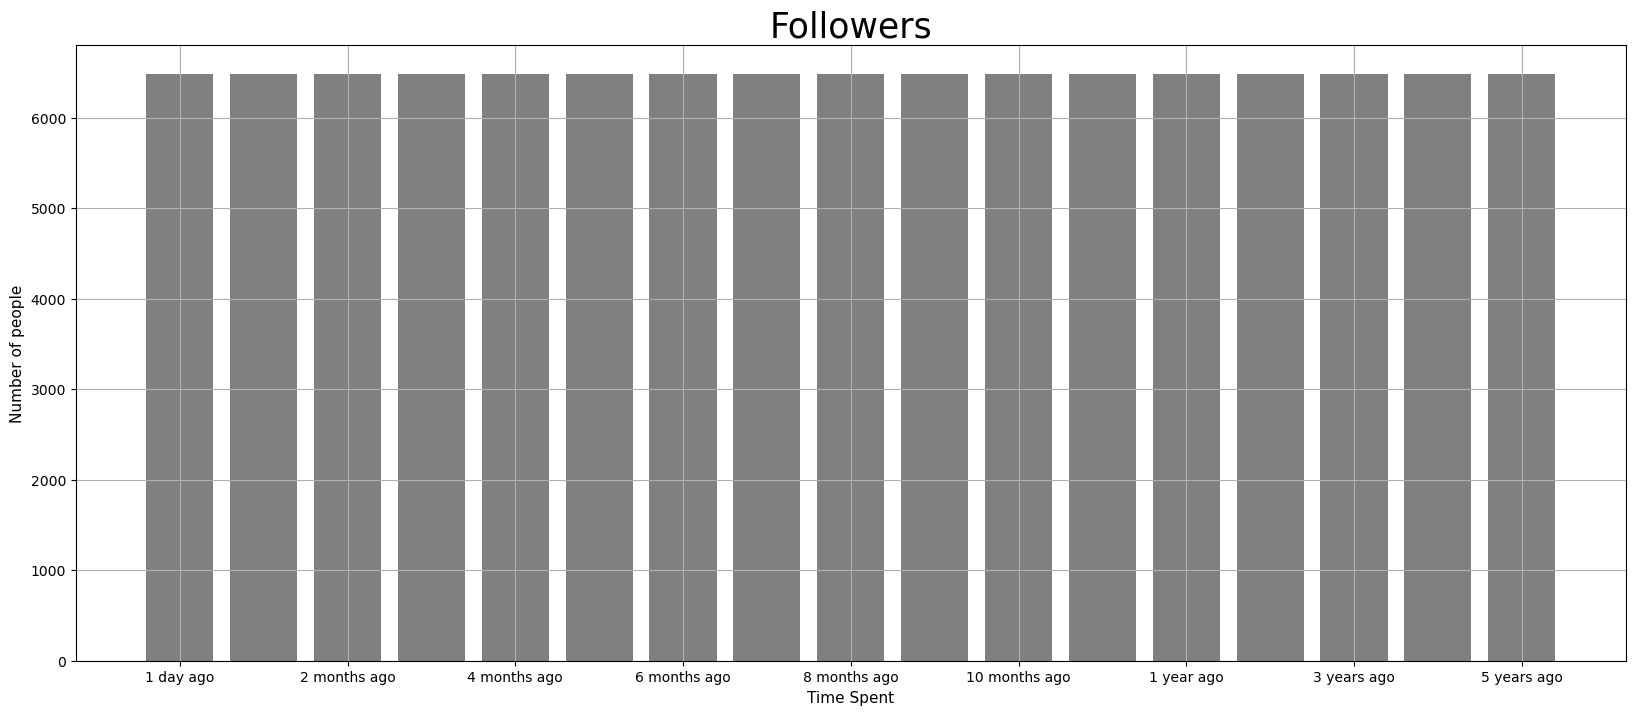

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(df_first['time_spent'], df_first['followers'], color='gray')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_xlabel('Time Spent', fontsize='11')
ax.set_ylabel('Number of people', fontsize='11')
plt.title('Followers', fontsize='25')
plt.grid()
plt.show()

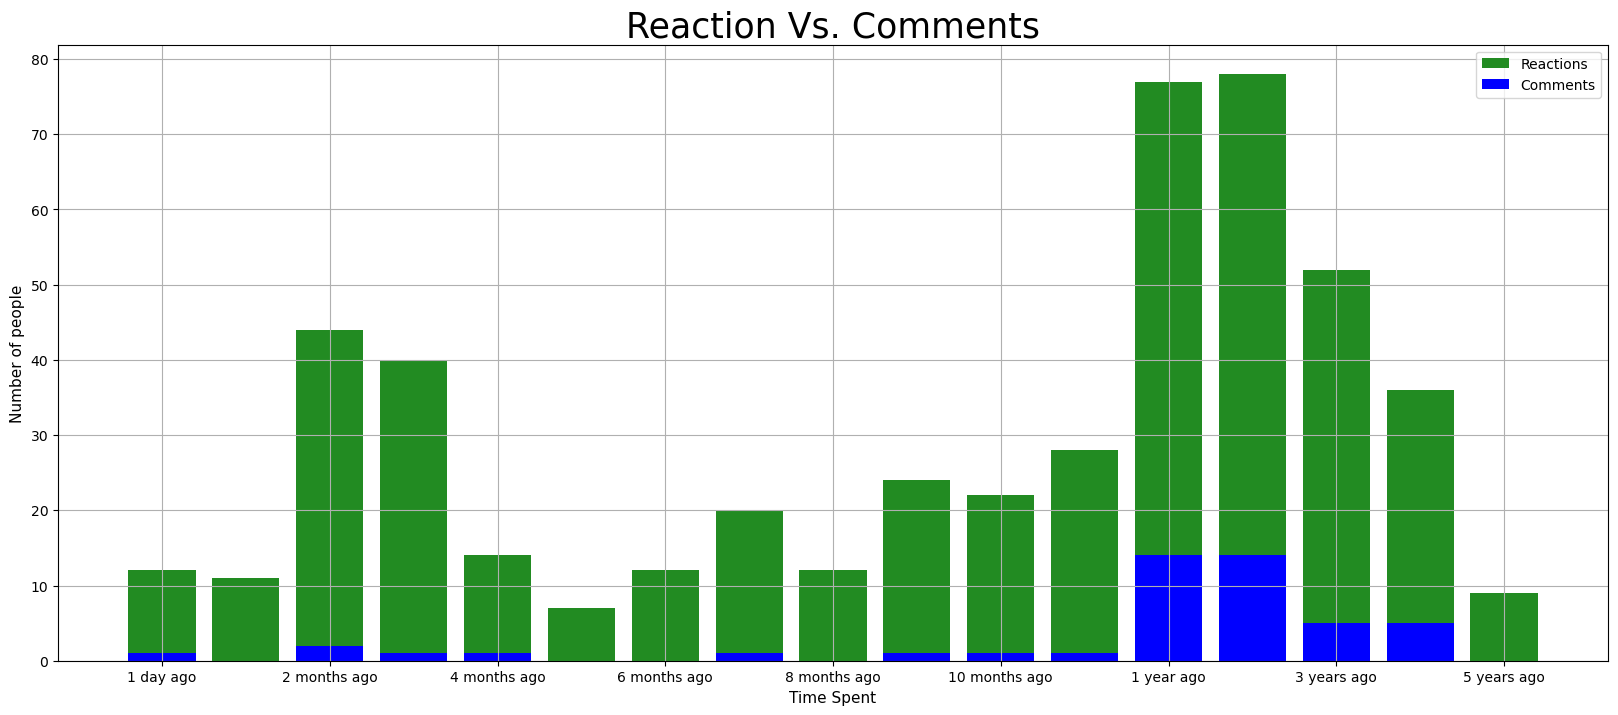

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(df_first['time_spent'], df_first['reactions'], color='forestgreen')
ax.bar(df_first['time_spent'], df_first['comments'], color='Blue')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_xlabel('Time Spent', fontsize='11')
ax.set_ylabel('Number of people', fontsize='11')
plt.title('Reaction Vs. Comments', fontsize='25')
plt.legend(['Reactions', 'Comments'])
plt.grid()
plt.show()

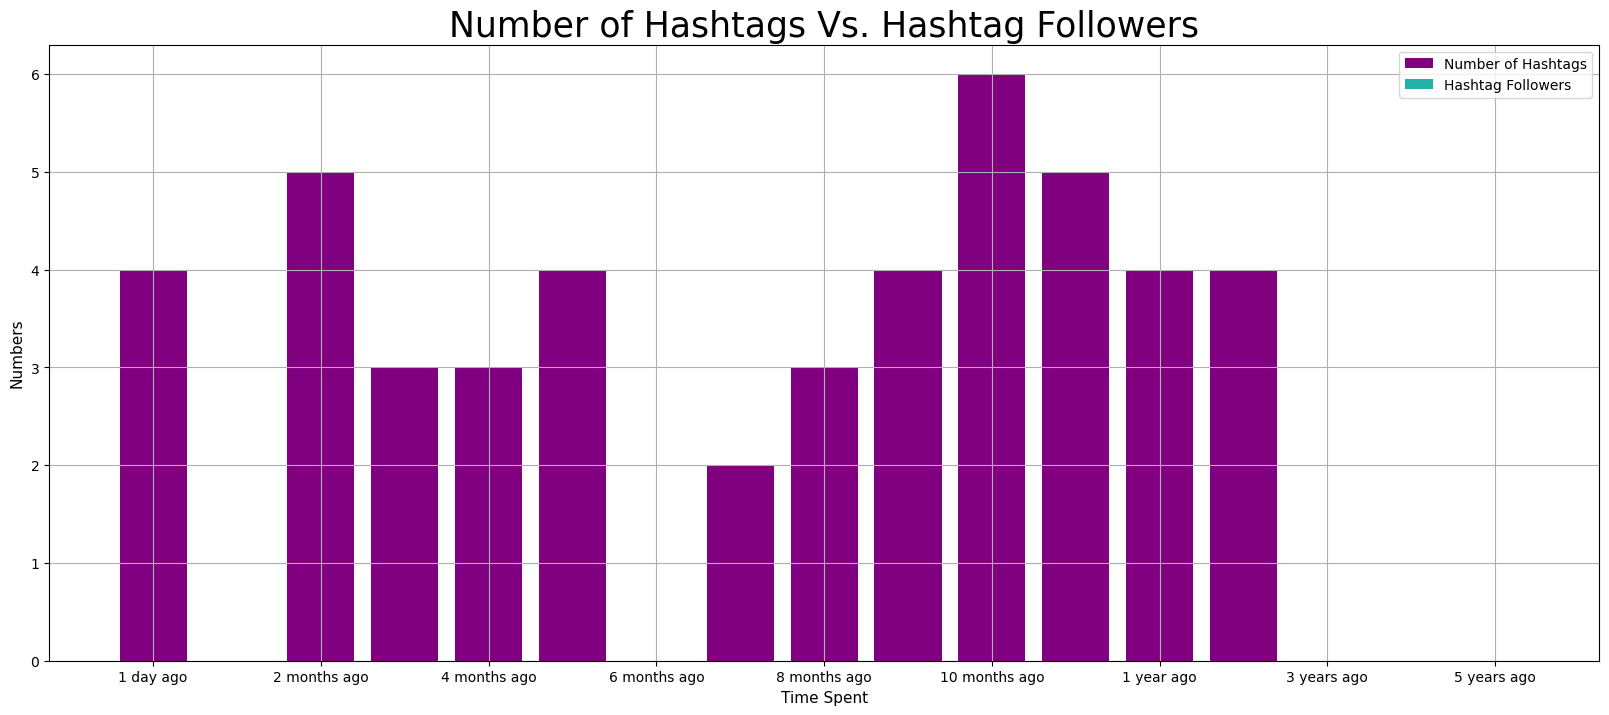

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(df_first['time_spent'], df_first['num_hashtags'], color='Purple')
ax.bar(df_first['time_spent'], df_first['hashtag_followers'], color='Lightseagreen')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_xlabel('Time Spent', fontsize='11')
ax.set_ylabel('Numbers', fontsize='11')
plt.title('Number of Hashtags Vs. Hashtag Followers', fontsize='25')
plt.legend(['Number of Hashtags', 'Hashtag Followers'])
plt.grid()
plt.show()

# Data Analysis for Tom Goodwin:

In [ ]:
df_tom = df_first = df[(df['name']=='Tom Goodwin')]

In [ ]:
df_tom.head()

Unnamed: 0         name                          headline  followers  \
14902       14902  Tom Goodwin  Co-Founder of ALL WE HAVE IS NOW   719334.0   
14903       14903  Tom Goodwin  Co-Founder of ALL WE HAVE IS NOW   719334.0   
14904       14904  Tom Goodwin  Co-Founder of ALL WE HAVE IS NOW   719334.0   
14905       14905  Tom Goodwin  Co-Founder of ALL WE HAVE IS NOW   719334.0   
14906       14906  Tom Goodwin  Co-Founder of ALL WE HAVE IS NOW   719334.0   

                                                   about   time_spent  \
14902  The best way to find out about me is to ask my...  6 hours ago   
14903  The best way to find out about me is to ask my...    1 day ago   
14904  The best way to find out about me is to ask my...    1 day ago   
14905  The best way to find out about me is to ask my...   2 days ago   
14906  The best way to find out about me is to ask my...   2 days ago   

      content_links                                          media_url  \
14902            []                                                 []   
14903            []  ['https://www.linkedin.com/pulse/dont-put-tech...   
14904            []                                                 []   
14905            []  ['https://media-exp1.licdn.com/dms/image/C4D22...   
14906            []  ['https://www.bloomberg.com/opinion/articles/2...   

       num_hashtags  hashtag_followers hashtags  reactions  comments  
14902             0                  0       []         78        14  
14903             0                  0       []         88         9  
14904             0                  0       []        148        13  
14905             0                  0       []        646       188  
14906             0                  0       []         54        13

In [ ]:
df_tom['followers'] = df_tom['followers'].dropna()

C:\Users\121322030021\AppData\Local\Temp\ipykernel_7516\1310313569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tom['followers'] = df_tom['followers'].dropna()


In [ ]:
df_tom.isna().sum()

Unnamed: 0           0
name                 0
headline             0
followers            0
about                0
time_spent           0
content_links        0
media_url            0
num_hashtags         0
hashtag_followers    0
hashtags             0
reactions            0
comments             0
dtype: int64

In [ ]:
df_tom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1272 entries, 14902 to 16173
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1272 non-null   int64  
 1   name               1272 non-null   object 
 2   headline           1272 non-null   object 
 3   followers          1272 non-null   float64
 4   about              1272 non-null   object 
 5   time_spent         1272 non-null   object 
 6   content_links      1272 non-null   object 
 7   media_url          1272 non-null   object 
 8   num_hashtags       1272 non-null   int64  
 9   hashtag_followers  1272 non-null   int64  
 10  hashtags           1272 non-null   object 
 11  reactions          1272 non-null   int64  
 12  comments           1272 non-null   int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 139.1+ KB


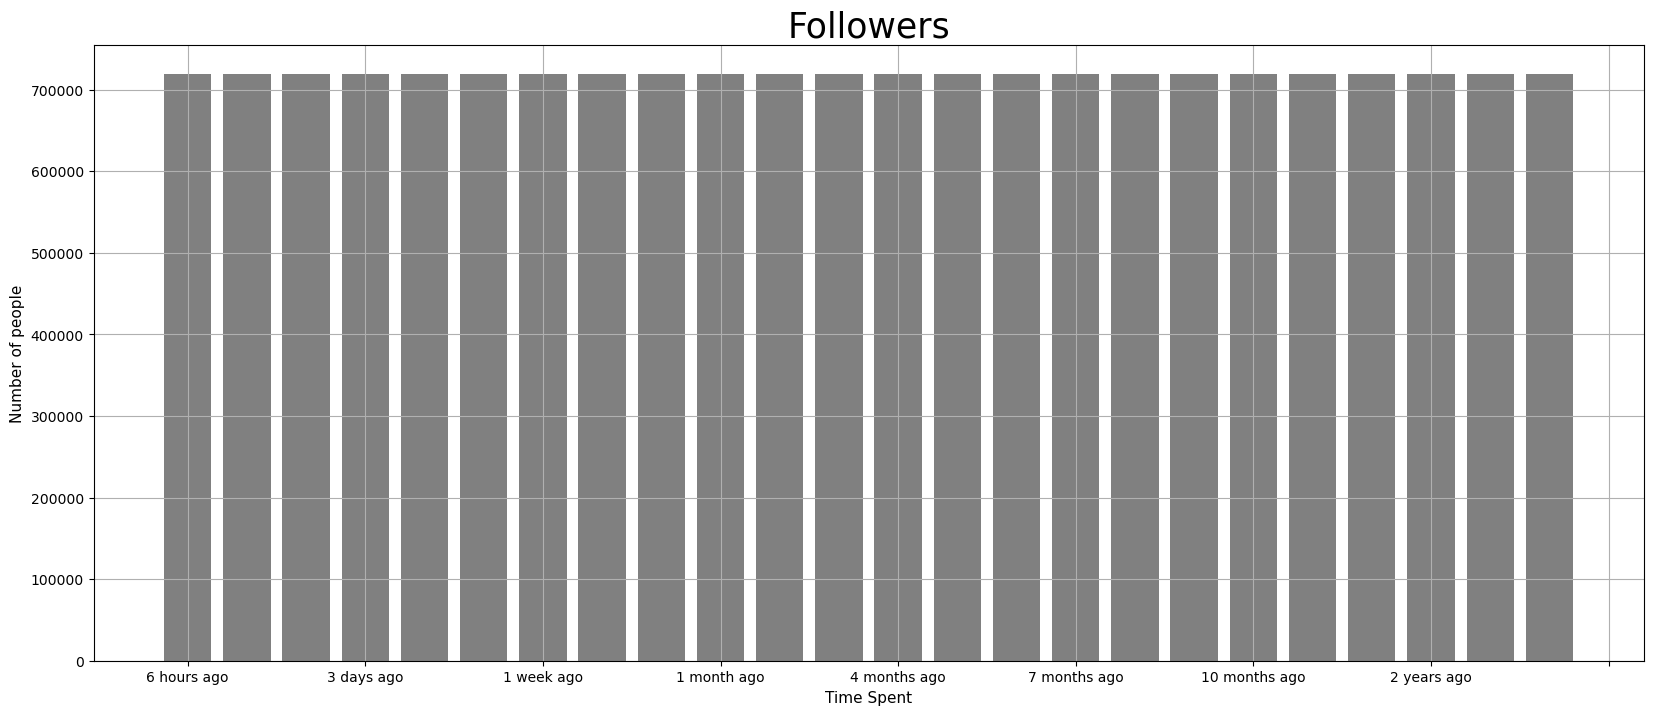

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(df_tom['time_spent'], df_tom['followers'], color='gray')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_xlabel('Time Spent', fontsize='11')
ax.set_ylabel('Number of people', fontsize='11')
plt.title('Followers', fontsize='25')
plt.grid()
plt.show()

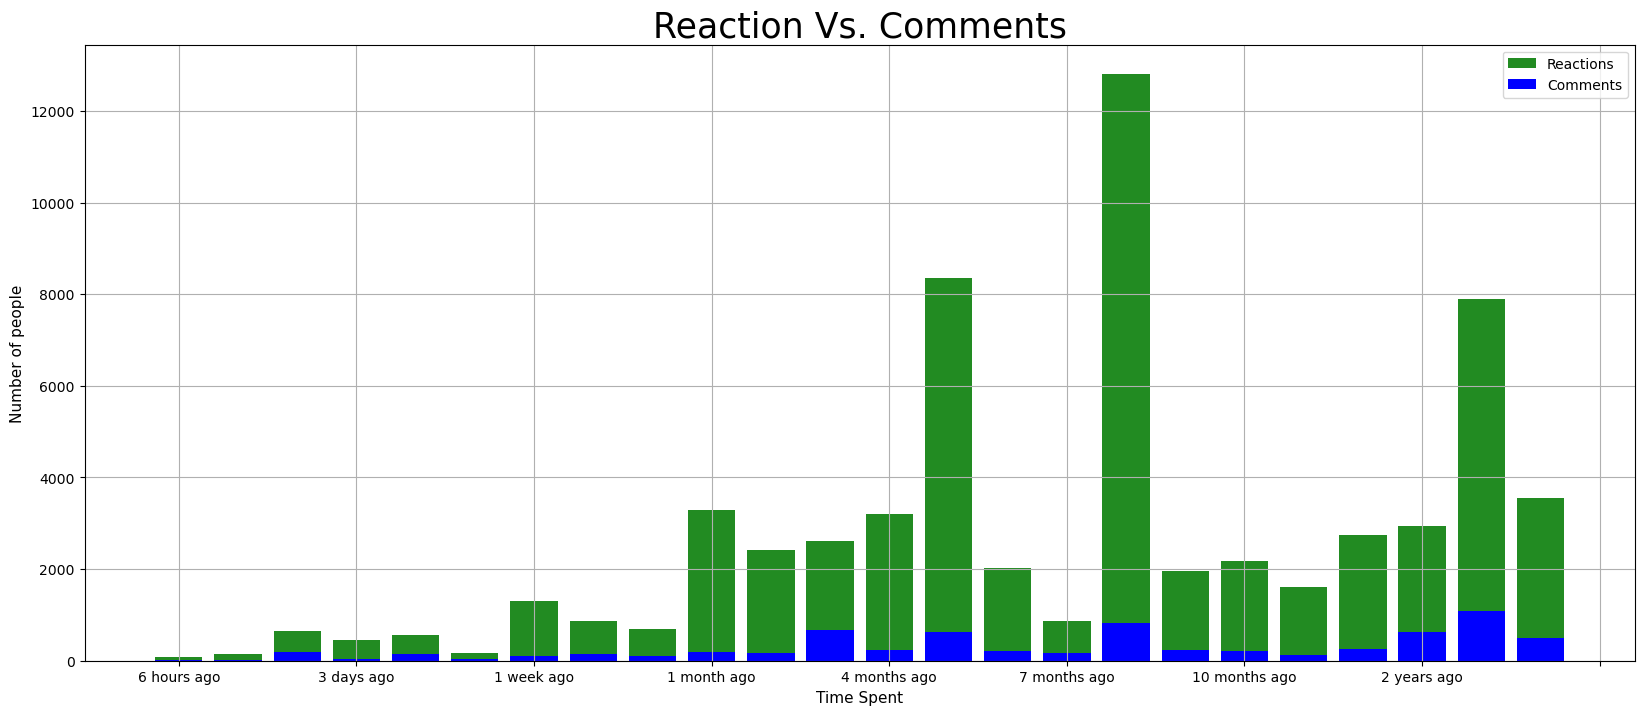

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(df_tom['time_spent'], df_tom['reactions'], color='forestgreen')
ax.bar(df_tom['time_spent'], df_tom['comments'], color='Blue')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_xlabel('Time Spent', fontsize='11')
ax.set_ylabel('Number of people', fontsize='11')
plt.title('Reaction Vs. Comments', fontsize='25')
plt.legend(['Reactions', 'Comments'])
plt.grid()
plt.show()